<a href="https://colab.research.google.com/github/ScriptSherpa/TensorFlow-Basic-to-Advanced---100-Projects-in-100-Days/blob/main/Multilayer_Perceptron_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data                                           # Features: sepal & petal length/width
y = iris.target.reshape(-1, 1)                          # Labels: 0, 1, 2

# One-hot encode labels for multi-class classification
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)                    # Convert to one-hot format

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)                      # Normalize features

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),   # First hidden layer with 10 ReLU units
    tf.keras.layers.Dense(8, activation='relu'),                      # Second hidden layer with 8 ReLU units
    tf.keras.layers.Dense(3, activation='softmax')                    # Output layer with softmax for 3 classes
])

# Compile the model with categorical crossentropy and Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)        # Train silently for 100 epochs

# Evaluate the model on the test set
loss, acc = model.evaluate(X_test, y_test, verbose=0)     # Evaluate model performance
print(f"Test Accuracy: {acc:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.93


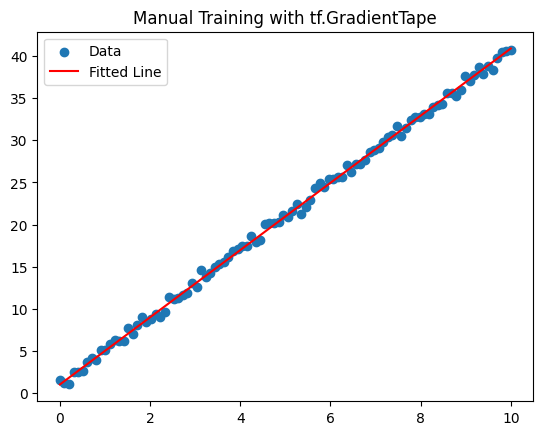

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.linspace(0, 10, 100).astype(np.float32)             # 100 input values from 0 to 10
# Target: linear relation + noise, ensuring float32 dtype for y
y = (4 * X + 1 + np.random.randn(*X.shape) * 0.5).astype(np.float32)

# Convert to tensors
X_tensor = tf.convert_to_tensor(X.reshape(-1, 1))           # Reshape to column vector
y_tensor = tf.convert_to_tensor(y.reshape(-1, 1))           # Reshape to column vector

# Initialize weight and bias variables
W = tf.Variable(tf.random.normal([1, 1]))                   # Weight initialized randomly
b = tf.Variable(tf.zeros([1]))                              # Bias initialized as zero

# Set learning rate and number of epochs
lr = 0.01
epochs = 200

# Training loop using GradientTape
for epoch in range(epochs):
    with tf.GradientTape() as tape:                         # Record operations for auto-diff
        y_pred = tf.matmul(X_tensor, W) + b                 # Compute predictions: y = Wx + b
        loss = tf.reduce_mean(tf.square(y_pred - y_tensor))# Mean Squared Error loss

    gradients = tape.gradient(loss, [W, b])                 # Compute gradients w.r.t W and b
    W.assign_sub(lr * gradients[0])                         # Update weights
    b.assign_sub(lr * gradients[1])                         # Update bias

# Make predictions after training
y_pred = tf.matmul(X_tensor, W) + b                         # Final prediction line

# Plot results
plt.scatter(X, y, label='Data')                             # Plot original data
plt.plot(X, y_pred.numpy(), color='red', label='Fitted Line') # Plot regression line
plt.title("Manual Training with tf.GradientTape")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


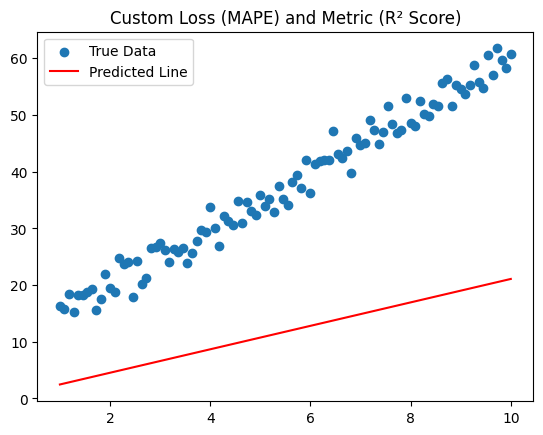

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic regression data
X = np.linspace(1, 10, 100).astype(np.float32)                 # Input values from 1 to 10
y = 5 * X + 10 + np.random.randn(*X.shape) * 2                 # Linear relation with noise

# Define a custom MAPE loss function
def custom_mape(y_true, y_pred):
    return tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100  # MAPE formula

# Define a custom R² (coefficient of determination) metric
def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))         # Residual sum of squares
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))  # Total sum of squares
    return 1 - ss_res / ss_tot                                 # R² formula

# Create a simple linear model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])            # Single neuron for linear regression
])

# Compile the model using custom loss and metric
model.compile(optimizer='adam', loss=custom_mape, metrics=[r2_score])

# Train the model
model.fit(X, y, epochs=100, verbose=0)                         # Train for 100 epochs silently

# Predict using the trained model
preds = model.predict(X)                                       # Make predictions on X

# Plot predictions
plt.scatter(X, y, label='True Data')                           # Scatter plot of actual data
plt.plot(X, preds, color='red', label='Predicted Line')        # Plot predicted line
plt.title("Custom Loss (MAPE) and Metric (R² Score)")
plt.legend()
plt.show()